In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd

telemetry = pd.read_csv('/content/drive/My Drive/PdM_telemetry.csv')
errors = pd.read_csv('/content/drive/My Drive/PdM_errors.csv')
maint = pd.read_csv('/content/drive/My Drive/PdM_maint.csv')
failures = pd.read_csv('/content/drive/My Drive/PdM_failures.csv')
machines = pd.read_csv('/content/drive/My Drive/PdM_machines.csv')

In [ ]:
# format datetime field which comes in as string
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'], format="%Y-%m-%d %H:%M:%S")

print("Total number of telemetry records: %d" % len(telemetry.index))
print(telemetry.head())
telemetry.describe()

Total number of telemetry records: 876100
             datetime  machineID        volt      rotate    pressure  vibration
0 2019-01-01 06:00:00          1  176.217853  418.504078  113.077935  45.087686
1 2019-01-01 07:00:00          1  162.879223  402.747490   95.460525  43.413973
2 2019-01-01 08:00:00          1  170.989902  527.349825   75.237905  34.178847
3 2019-01-01 09:00:00          1  162.462833  346.149335  109.248561  41.122144
4 2019-01-01 10:00:00          1  157.610021  435.376873  111.886648  25.990511


,machineID,volt,rotate,pressure,vibration
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,170.777737,446.605119,100.858668,40.385007
std,28.866087,15.509114,52.673886,11.048679,5.370361
min,1.000000,97.333604,138.432075,51.237106,14.877054
25%,25.750000,160.304927,412.305714,93.498181,36.777299
50%,50.500000,170.607338,447.558150,100.425559,40.237247
75%,75.250000,181.004493,482.176600,107.555231,43.784938
max,100.000000,255.124717,695.020984,185.951998,76.791072


In [ ]:
print(telemetry.tail())

                  datetime  machineID  ...    pressure  vibration
876095 2020-01-01 02:00:00        100  ...  102.290715  50.771941
876096 2020-01-01 03:00:00        100  ...   98.180607  35.123072
876097 2020-01-01 04:00:00        100  ...   94.132837  48.314561
876098 2020-01-01 05:00:00        100  ...  104.081073  44.835259
876099 2020-01-01 06:00:00        100  ...   79.095538  37.845245

[5 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 0, 'Date')

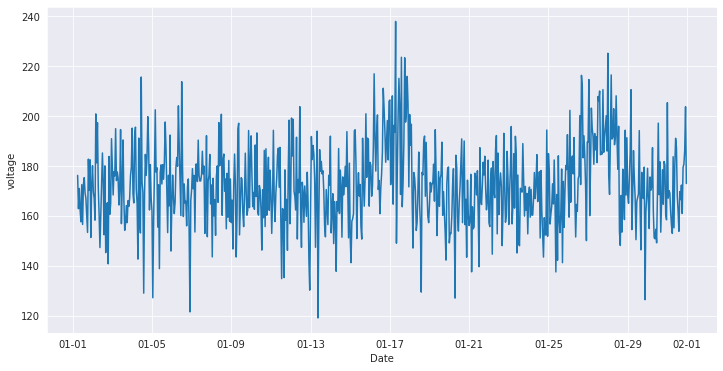

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = telemetry.loc[(telemetry['machineID'] == 1) &
                        (telemetry['datetime'] > pd.to_datetime('2019-01-01')) &
                        (telemetry['datetime'] < pd.to_datetime('2019-02-01')), ['datetime', 'volt']]

sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.plot(plot_df['datetime'], plot_df['volt'])
plt.ylabel('voltage')

# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
adf.scaled[1.0] = '%m-%d'
plt.xlabel('Date')

In [ ]:
# format datetime field which comes in as string
errors['datetime'] = pd.to_datetime(errors['datetime'], format="%Y-%m-%d %H:%M:%S")
errors['errorID'] = errors['errorID'].astype('category')

print("Total number of error records: %d" % len(errors.index))
errors.head()

Total number of error records: 3919


,datetime,machineID,errorID
0,2019-01-03 07:00:00,1,error1
1,2019-01-03 20:00:00,1,error3
2,2019-01-04 06:00:00,1,error5
3,2019-01-10 15:00:00,1,error4
4,2019-01-22 10:00:00,1,error4


Text(0, 0.5, 'Count')

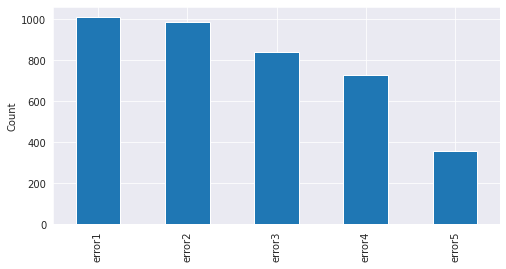

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
errors['errorID'].value_counts().plot(kind='bar')
plt.ylabel('Count')

In [ ]:
# format datetime field which comes in as string
maint['datetime'] = pd.to_datetime(maint['datetime'], format="%Y-%m-%d %H:%M:%S")
maint['comp'] = maint['comp'].astype('category')

print("Total number of maintenance records: %d" % len(maint.index))
maint.head()

Total number of maintenance records: 3286


,datetime,machineID,comp
0,2018-06-01 06:00:00,1,comp2
1,2018-07-16 06:00:00,1,comp4
2,2018-07-31 06:00:00,1,comp3
3,2018-12-13 06:00:00,1,comp1
4,2019-01-05 06:00:00,1,comp4


Text(0, 0.5, 'Count')

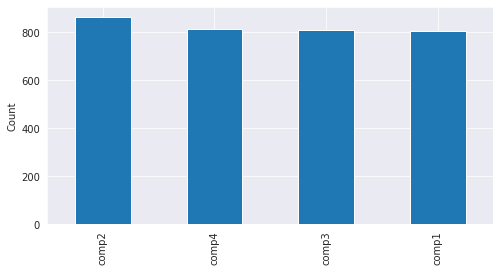

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
maint['comp'].value_counts().plot(kind='bar')
plt.ylabel('Count')

In [ ]:
machines['model'] = machines['model'].astype('category')

print("Total number of machines: %d" % len(machines.index))
machines.head()

Total number of machines: 100


,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


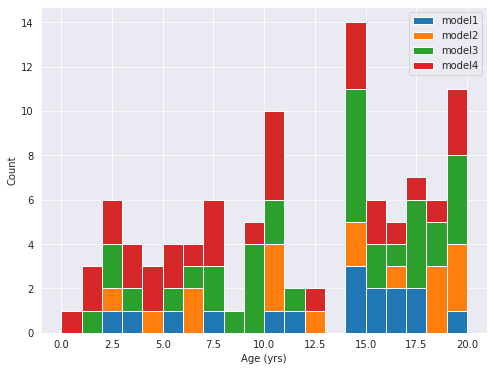

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
_, bins, _ = plt.hist([machines.loc[machines['model'] == 'model1', 'age'],
                       machines.loc[machines['model'] == 'model2', 'age'],
                       machines.loc[machines['model'] == 'model3', 'age'],
                       machines.loc[machines['model'] == 'model4', 'age']],
                       20, stacked=True, label=['model1', 'model2', 'model3', 'model4'])
plt.xlabel('Age (yrs)')
plt.ylabel('Count')
plt.legend()

In [ ]:
# format datetime field which comes in as string
failures['datetime'] = pd.to_datetime(failures['datetime'], format="%Y-%m-%d %H:%M:%S")
failures['failure'] = failures['failure'].astype('category')

print("Total number of failures: %d" % len(failures.index))
failures.head()

Total number of failures: 761


,datetime,machineID,failure
0,2019-01-05 06:00:00,1,comp4
1,2019-03-06 06:00:00,1,comp1
2,2019-04-20 06:00:00,1,comp2
3,2019-06-19 06:00:00,1,comp4
4,2019-09-02 06:00:00,1,comp4


Text(0, 0.5, 'Count')

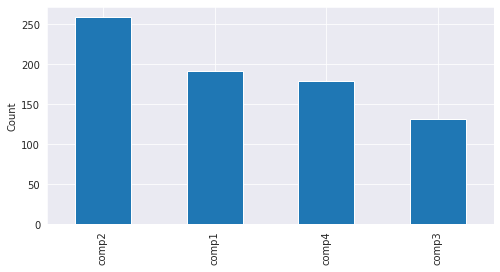

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
failures['failure'].value_counts().plot(kind='bar')
plt.ylabel('Count')

In [ ]:
# Calculate mean values for telemetry features
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col).resample('3H', closed='left', label='right').mean().unstack())
telemetry_mean_3h = pd.concat(temp, axis=1)
telemetry_mean_3h.columns = [i + 'mean_3h' for i in fields]
telemetry_mean_3h.reset_index(inplace=True)

# repeat for standard deviation
temp = []
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col).resample('3H', closed='left', label='right').std().unstack())
telemetry_sd_3h = pd.concat(temp, axis=1)
telemetry_sd_3h.columns = [i + 'sd_3h' for i in fields]
telemetry_sd_3h.reset_index(inplace=True)

telemetry_mean_3h.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h
0,1,2019-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502
1,1,2019-01-01 12:00:00,164.192565,403.949857,105.687417,34.255891
2,1,2019-01-01 15:00:00,168.134445,435.781707,107.793709,41.239405
3,1,2019-01-01 18:00:00,165.514453,430.472823,101.703289,40.373739
4,1,2019-01-01 21:00:00,168.809347,437.111120,90.911060,41.738542


In [ ]:
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,index='datetime',
                                               columns='machineID',
                                               values=col).rolling(24).mean().resample('3H',
                                                                                closed='left',
                                                                                label='right').first().unstack())
telemetry_mean_24h = pd.concat(temp, axis=1)
telemetry_mean_24h.columns = [i + 'mean_24h' for i in fields]
telemetry_mean_24h.reset_index(inplace=True)
telemetry_mean_24h = telemetry_mean_24h.loc[-telemetry_mean_24h['voltmean_24h'].isnull()]

# repeat for standard deviation
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,index='datetime',
                                               columns='machineID',
                                               values=col).rolling(window=24).std().resample('3H',
                                                                                closed='left',
                                                                                label='right').first().unstack())
telemetry_sd_24h = pd.concat(temp, axis=1)
telemetry_sd_24h.columns = [i + 'sd_24h' for i in fields]
telemetry_sd_24h.reset_index(inplace=True)
telemetry_sd_24h = telemetry_sd_24h.loc[-telemetry_sd_24h['voltsd_24h'].isnull()]

# Notice that a 24h rolling average is not available at the earliest timepoints
telemetry_mean_24h.head(10)

,machineID,datetime,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h
7,1,2019-01-02 06:00:00,169.733809,445.179865,96.797113,40.385160
8,1,2019-01-02 09:00:00,170.614862,446.364859,96.849785,39.736826
9,1,2019-01-02 12:00:00,169.893965,447.009407,97.715600,39.498374
10,1,2019-01-02 15:00:00,171.243444,444.233563,96.666060,40.229370
11,1,2019-01-02 18:00:00,170.792486,448.440437,95.766838,40.055214
12,1,2019-01-02 21:00:00,170.556674,452.267095,98.065860,40.033247
13,1,2019-01-03 00:00:00,168.460525,451.031783,99.273286,38.903462
14,1,2019-01-03 03:00:00,169.772951,447.502464,99.005946,39.389725
15,1,2019-01-03 06:00:00,170.900562,453.864597,100.877342,38.696225
16,1,2019-01-03 09:00:00,169.533156,454.785072,100.050567,39.449734


In [ ]:
# merge columns of feature sets created earlier
telemetry_feat = pd.concat([telemetry_mean_3h,
                            telemetry_sd_3h.iloc[:, 2:6],
                            telemetry_mean_24h.iloc[:, 2:6],
                            telemetry_sd_24h.iloc[:, 2:6]], axis=1).dropna()
telemetry_feat.describe()

,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
count,291300.00000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000
mean,50.50000,170.771416,446.612973,100.855301,40.384328,13.299858,44.456335,8.885822,4.440660,170.772579,446.613440,100.854547,40.384564,14.918849,49.947916,10.046687,5.002065
std,28.86612,9.497201,33.122865,7.408854,3.476641,6.966647,23.216421,4.656341,2.320066,4.716970,18.074248,4.733098,2.059861,2.260726,7.682126,1.713726,0.799820
min,1.00000,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278,155.812721,266.010419,91.057429,35.060087,6.380619,18.385248,4.145308,2.144863
25%,25.75000,164.445576,427.568132,96.238173,38.147839,8.027455,26.903567,5.370647,2.684308,168.070890,441.549802,98.668589,39.354062,13.358663,44.668824,8.924317,4.460347
50%,50.50000,170.430790,448.385564,100.233139,40.146085,12.495595,41.795700,8.345785,4.173854,170.210913,449.212554,100.097694,40.072752,14.853948,49.613807,9.921407,4.958594
75%,75.25000,176.607051,468.447680,104.404520,42.227392,17.689118,59.103715,11.789645,5.898997,172.459612,456.368008,101.611121,40.833364,16.394764,54.821318,10.980498,5.484480
max,100.00000,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595,220.782618,499.096975,152.310351,61.932124,27.664538,103.819421,28.654103,12.325783


In [ ]:
# create a column for each error type
error_count = pd.get_dummies(errors.set_index('datetime')).reset_index()
error_count.columns = ['datetime', 'machineID', 'error1', 'error2', 'error3', 'error4', 'error5']

# combine errors for a given machine in a given hour
error_count = error_count.groupby(['machineID', 'datetime']).sum().reset_index()
error_count.head(13)

,machineID,datetime,error1,error2,error3,error4,error5
0,1,2019-01-03 07:00:00,1,0,0,0,0
1,1,2019-01-03 20:00:00,0,0,1,0,0
2,1,2019-01-04 06:00:00,0,0,0,0,1
3,1,2019-01-10 15:00:00,0,0,0,1,0
4,1,2019-01-22 10:00:00,0,0,0,1,0
5,1,2019-01-25 15:00:00,0,0,0,1,0
6,1,2019-01-27 04:00:00,1,0,0,0,0
7,1,2019-03-03 22:00:00,0,1,0,0,0
8,1,2019-03-05 06:00:00,1,0,0,0,0
9,1,2019-03-20 18:00:00,1,0,0,0,0


In [ ]:
error_count = telemetry[['datetime', 'machineID']].merge(error_count, on=['machineID', 'datetime'], how='left').fillna(0.0)
error_count.describe()

,machineID,error1,error2,error3,error4,error5
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,0.001153,0.001128,0.000957,0.000830,0.000406
std,28.866087,0.033934,0.033563,0.030913,0.028795,0.020154
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.250000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
temp = []
fields = ['error%d' % i for i in range(1,6)]
for col in fields:
    temp.append(pd.pivot_table(error_count,index='datetime',
                                               columns='machineID',
                                               values=col).rolling(window=24).sum().resample('3H',
                                                                             closed='left',
                                                                             label='right').first().unstack())
error_count = pd.concat(temp, axis=1)
error_count.columns = [i + 'count' for i in fields]
error_count.reset_index(inplace=True)
error_count = error_count.dropna()
error_count.describe()

,machineID,error1count,error2count,error3count,error4count,error5count
count,291400.00000,291400.000000,291400.000000,291400.000000,291400.000000,291400.000000
mean,50.50000,0.027649,0.027069,0.022907,0.019904,0.009753
std,28.86612,0.166273,0.164429,0.151453,0.140820,0.098797
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.75000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.50000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.25000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.00000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
error_count.head()

,machineID,datetime,error1count,error2count,error3count,error4count,error5count
7,1,2019-01-02 06:00:00,0.0,0.0,0.0,0.0,0.0
8,1,2019-01-02 09:00:00,0.0,0.0,0.0,0.0,0.0
9,1,2019-01-02 12:00:00,0.0,0.0,0.0,0.0,0.0
10,1,2019-01-02 15:00:00,0.0,0.0,0.0,0.0,0.0
11,1,2019-01-02 18:00:00,0.0,0.0,0.0,0.0,0.0


In [ ]:
import numpy as np

# create a column for each error type
comp_rep = pd.get_dummies(maint.set_index('datetime')).reset_index()
comp_rep.columns = ['datetime', 'machineID', 'comp1', 'comp2', 'comp3', 'comp4']

# combine repairs for a given machine in a given hour
comp_rep = comp_rep.groupby(['machineID', 'datetime']).sum().reset_index()

# add timepoints where no components were replaced
comp_rep = telemetry[['datetime', 'machineID']].merge(comp_rep,
                                                      on=['datetime', 'machineID'],
                                                      how='outer').fillna(0).sort_values(by=['machineID', 'datetime'])

components = ['comp1', 'comp2', 'comp3', 'comp4']
for comp in components:
    # convert indicator to most recent date of component change
    comp_rep.loc[comp_rep[comp] < 1, comp] = None
    comp_rep.loc[-comp_rep[comp].isnull(), comp] = comp_rep.loc[-comp_rep[comp].isnull(), 'datetime']
    
    # forward-fill the most-recent date of component change
    comp_rep[comp] = comp_rep[comp].fillna(method='ffill')

# remove dates in 2014 (may have NaN or future component change dates)    
comp_rep = comp_rep.loc[pd.to_datetime(comp_rep['datetime']) > pd.to_datetime('2019-01-01')]

# replace dates of most recent component change with days since most recent component change
for comp in components:
    comp_rep[comp] = (pd.to_datetime(comp_rep['datetime']) - pd.to_datetime(comp_rep[comp])) / np.timedelta64(1, 'D')
    
comp_rep.describe()

,machineID,comp1,comp2,comp3,comp4
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,53.525185,51.540806,52.725962,53.834191
std,28.866087,62.491679,59.269254,58.873114,59.707978
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25.750000,13.291667,12.125000,13.125000,13.000000
50%,50.500000,32.791667,29.666667,32.291667,32.500000
75%,75.250000,68.708333,66.541667,67.333333,70.458333
max,100.000000,491.958333,348.958333,370.958333,394.958333


In [ ]:
comp_rep.head()

,datetime,machineID,comp1,comp2,comp3,comp4
0,2019-01-01 06:00:00,1,19.000000,214.000000,154.000000,169.000000
1,2019-01-01 07:00:00,1,19.041667,214.041667,154.041667,169.041667
2,2019-01-01 08:00:00,1,19.083333,214.083333,154.083333,169.083333
3,2019-01-01 09:00:00,1,19.125000,214.125000,154.125000,169.125000
4,2019-01-01 10:00:00,1,19.166667,214.166667,154.166667,169.166667


In [ ]:
final_feat = telemetry_feat.merge(error_count, on=['datetime', 'machineID'], how='left')
final_feat = final_feat.merge(comp_rep, on=['datetime', 'machineID'], how='left')
final_feat = final_feat.merge(machines, on=['machineID'], how='left')

print(final_feat.head())
final_feat.describe()

   machineID            datetime  voltmean_3h  ...    comp4   model  age
0          1 2019-01-02 06:00:00   180.133784  ...  170.000  model3   18
1          1 2019-01-02 09:00:00   176.364293  ...  170.125  model3   18
2          1 2019-01-02 12:00:00   160.384568  ...  170.250  model3   18
3          1 2019-01-02 15:00:00   170.472461  ...  170.375  model3   18
4          1 2019-01-02 18:00:00   163.263806  ...  170.500  model3   18

[5 rows x 29 columns]


,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,age
count,291300.00000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000
mean,50.50000,170.771416,446.612973,100.855301,40.384328,13.299858,44.456335,8.885822,4.440660,170.772579,446.613440,100.854547,40.384564,14.918849,49.947916,10.046687,5.002065,0.027659,0.027075,0.022901,0.019907,0.009756,53.350748,51.318963,52.512108,53.619118,11.330000
std,28.86612,9.497201,33.122865,7.408854,3.476641,6.966647,23.216421,4.656341,2.320066,4.716970,18.074248,4.733098,2.059861,2.260726,7.682126,1.713726,0.799820,0.166301,0.164446,0.151435,0.140832,0.098813,62.418063,59.140743,58.765904,59.606886,5.827625
min,1.00000,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278,155.812721,266.010419,91.057429,35.060087,6.380619,18.385248,4.145308,2.144863,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.75000,164.445576,427.568132,96.238173,38.147839,8.027455,26.903567,5.370647,2.684308,168.070890,441.549802,98.668589,39.354062,13.358663,44.668824,8.924317,4.460347,0.000000,0.000000,0.000000,0.000000,0.000000,13.250000,12.000000,13.000000,12.875000,6.750000
50%,50.50000,170.430790,448.385564,100.233139,40.146085,12.495595,41.795700,8.345785,4.173854,170.210913,449.212554,100.097694,40.072752,14.853948,49.613807,9.921407,4.958594,0.000000,0.000000,0.000000,0.000000,0.000000,32.625000,29.500000,32.125000,32.375000,12.000000
75%,75.25000,176.607051,468.447680,104.404520,42.227392,17.689118,59.103715,11.789645,5.898997,172.459612,456.368008,101.611121,40.833364,16.394764,54.821318,10.980498,5.484480,0.000000,0.000000,0.000000,0.000000,0.000000,68.500000,66.250000,67.000000,70.125000,16.000000
max,100.00000,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595,220.782618,499.096975,152.310351,61.932124,27.664538,103.819421,28.654103,12.325783,2.000000,2.000000,2.000000,2.000000,2.000000,491.875000,348.875000,370.875000,394.875000,20.000000


In [ ]:
labeled_features = final_feat.merge(failures, on=['datetime', 'machineID'], how='left')
#labeled_features = labeled_features.fillna(method='bfill', limit=7)
labeled_features = labeled_features.bfill(axis=1, limit=7) # fill backward up to 24h
labeled_features = labeled_features.fillna('none')
labeled_features.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
0,1,2019-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,169.733809,445.179865,96.797113,40.385160,11.233120,48.717395,10.079880,5.853209,0.0,0.0,0.0,0.0,0.0,20.000,215.000,155.000,170.000,model3,18,none
1,1,2019-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,170.614862,446.364859,96.849785,39.736826,12.519402,48.385076,10.171540,6.163231,0.0,0.0,0.0,0.0,0.0,20.125,215.125,155.125,170.125,model3,18,none
2,1,2019-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,169.893965,447.009407,97.715600,39.498374,13.370357,42.432317,9.471669,6.195076,0.0,0.0,0.0,0.0,0.0,20.250,215.250,155.250,170.250,model3,18,none
3,1,2019-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,171.243444,444.233563,96.666060,40.229370,13.299281,41.346121,8.731229,5.687944,0.0,0.0,0.0,0.0,0.0,20.375,215.375,155.375,170.375,model3,18,none
4,1,2019-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,170.792486,448.440437,95.766838,40.055214,13.954518,43.490234,8.061653,5.898069,0.0,0.0,0.0,0.0,0.0,20.500,215.500,155.500,170.500,model3,18,none


In [ ]:
labeled_features.to_csv("/content/drive/My Drive/labeled_features.csv")

In [ ]:
labeled_features.loc[labeled_features['failure'] == 'comp4'][:16]

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
24,1,2019-01-05 06:00:00,185.782709,439.531288,99.413660,51.558082,14.495664,45.663743,4.289212,7.330397,170.757841,440.958228,98.716746,51.746749,20.837993,34.051825,9.654971,5.066388,0.0,0.0,0.0,0.0,1.0,0.0,218.0,158.0,0.0,model3,18,comp4
1344,1,2019-06-19 06:00:00,172.059069,463.242610,96.905050,53.701413,14.757880,55.874000,3.204981,2.329615,170.445687,463.690447,101.515062,47.807739,15.872992,49.495570,9.978860,5.184487,0.0,0.0,0.0,0.0,1.0,0.0,30.0,15.0,0.0,model3,18,comp4
1944,1,2019-09-02 06:00:00,165.530175,413.547130,103.631528,60.142846,9.088618,49.918671,14.438808,5.389723,167.029771,443.829391,96.763961,56.557153,15.342985,46.695751,12.134162,7.775558,0.0,0.0,0.0,0.0,1.0,0.0,60.0,90.0,0.0,model3,18,comp4
2784,1,2019-12-16 06:00:00,188.941806,421.756494,86.684047,51.410144,35.295874,7.839110,9.139511,3.598700,171.788966,441.223916,100.700667,50.171569,11.032504,44.242508,10.373906,5.148273,0.0,0.0,0.0,0.0,1.0,75.0,30.0,15.0,0.0,model3,18,comp4
17656,7,2019-01-24 06:00:00,177.669082,361.502737,109.447331,46.975392,8.531048,29.773424,4.384169,5.187506,166.811536,362.438916,100.749561,49.510716,17.595689,42.688913,9.934615,6.238848,0.0,1.0,1.0,0.0,1.0,207.0,0.0,207.0,0.0,model3,20,comp4
18496,7,2019-05-09 06:00:00,175.911702,467.458682,103.589910,52.610306,12.400140,69.604586,11.162580,1.658487,178.152614,443.530687,99.552659,51.131662,16.274802,45.450934,9.069829,5.332286,0.0,0.0,0.0,0.0,1.0,0.0,30.0,45.0,0.0,model3,20,comp4
19576,7,2019-09-21 06:00:00,169.123329,428.763286,99.428189,45.397202,21.723826,100.568119,22.697296,3.416446,168.418191,461.439426,104.776573,49.026631,15.780937,54.286574,9.112983,4.553363,0.0,0.0,0.0,0.0,1.0,0.0,30.0,60.0,0.0,model3,20,comp4
21025,8,2019-03-22 06:00:00,173.026438,429.852151,102.408383,54.340943,11.452078,42.822464,11.195405,7.115879,175.462890,437.799564,101.178980,50.022666,14.836537,54.453240,10.514693,4.742447,0.0,0.0,0.0,0.0,1.0,60.0,15.0,204.0,0.0,model3,16,comp4
22105,8,2019-08-04 06:00:00,178.611054,425.076676,102.481539,48.617995,12.652412,22.014775,18.517554,2.918507,172.592814,458.454041,98.882610,49.410772,13.561776,60.944818,11.413782,4.850894,0.0,0.0,0.0,0.0,1.0,30.0,45.0,15.0,0.0,model3,16,comp4
22705,8,2019-10-18 06:00:00,166.642406,452.842842,104.470047,52.080654,5.920407,46.523492,5.792959,4.005665,173.747366,468.027501,100.173176,48.740484,11.828295,49.724469,9.775905,5.506232,0.0,0.0,0.0,0.0,1.0,15.0,60.0,90.0,0.0,model3,16,comp4


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# make test and training splits
threshold_dates = [[pd.to_datetime('2019-07-31 01:00:00'), pd.to_datetime('2019-08-01 01:00:00')],
                   [pd.to_datetime('2019-08-31 01:00:00'), pd.to_datetime('2019-09-01 01:00:00')],
                   [pd.to_datetime('2019-09-30 01:00:00'), pd.to_datetime('2019-10-01 01:00:00')]]

test_results = []
models = []
for last_train_date, first_test_date in threshold_dates:
    # split out training and test data
    train_y = labeled_features.loc[labeled_features['datetime'] < last_train_date, 'failure']
    train_X = pd.get_dummies(labeled_features.loc[labeled_features['datetime'] < last_train_date].drop(['datetime',
                                                                                                        'machineID',
                                                                                                        'failure'], 1))
    test_X = pd.get_dummies(labeled_features.loc[labeled_features['datetime'] > first_test_date].drop(['datetime',
                                                                                                       'machineID',
                                                                                                       'failure'], 1))
    # train and predict using the model, storing results for later
    my_model = GradientBoostingClassifier(random_state=42)
    my_model.fit(train_X, train_y)
    test_result = pd.DataFrame(labeled_features.loc[labeled_features['datetime'] > first_test_date])
    test_result['predicted_failure'] = my_model.predict(test_X)
    test_results.append(test_result)
    models.append(my_model)

In [ ]:
my_model.predict(test_X)

array(['none', 'none', 'none', ..., 'none', 'none', 'none'], dtype=object)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
last_train_date

Timestamp('2019-09-30 01:00:00')

In [ ]:
first_test_date

Timestamp('2019-10-01 01:00:00')

In [ ]:
threshold_dates

[[Timestamp('2019-07-31 01:00:00'), Timestamp('2019-08-01 01:00:00')],
 [Timestamp('2019-08-31 01:00:00'), Timestamp('2019-09-01 01:00:00')],
 [Timestamp('2019-09-30 01:00:00'), Timestamp('2019-10-01 01:00:00')]]

In [ ]:
train_y

0         none
1         none
2         none
3         none
4         none
          ... 
290590    none
290591    none
290592    none
290593    none
290594    none
Name: failure, Length: 216732, dtype: object

In [ ]:
train_X

,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,age,model_model1,model_model2,model_model3,model_model4
0,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,169.733809,445.179865,96.797113,40.385160,11.233120,48.717395,10.079880,5.853209,0.0,0.0,0.0,0.0,0.0,20.000,215.000,155.000,170.000,18,0,0,1,0
1,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,170.614862,446.364859,96.849785,39.736826,12.519402,48.385076,10.171540,6.163231,0.0,0.0,0.0,0.0,0.0,20.125,215.125,155.125,170.125,18,0,0,1,0
2,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,169.893965,447.009407,97.715600,39.498374,13.370357,42.432317,9.471669,6.195076,0.0,0.0,0.0,0.0,0.0,20.250,215.250,155.250,170.250,18,0,0,1,0
3,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,171.243444,444.233563,96.666060,40.229370,13.299281,41.346121,8.731229,5.687944,0.0,0.0,0.0,0.0,0.0,20.375,215.375,155.375,170.375,18,0,0,1,0
4,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,170.792486,448.440437,95.766838,40.055214,13.954518,43.490234,8.061653,5.898069,0.0,0.0,0.0,0.0,0.0,20.500,215.500,155.500,170.500,18,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290590,155.079380,450.187759,101.838939,44.109299,23.896443,26.392918,10.179209,7.432649,170.528530,444.326173,100.810076,39.376368,14.506501,41.510387,9.177862,5.390787,0.0,0.0,0.0,0.0,0.0,4.250,64.250,49.250,34.250,5,0,0,0,1
290591,185.390529,435.256907,92.831119,43.530138,18.810846,78.604196,10.683806,0.878059,169.717305,446.631597,99.571418,40.318183,17.743316,41.217863,8.178861,5.776905,0.0,0.0,0.0,0.0,0.0,4.375,64.375,49.375,34.375,5,0,0,0,1
290592,166.113912,444.157407,103.054512,38.293970,13.242216,34.509446,7.649707,3.353349,171.360297,444.384052,99.005152,40.702089,18.015838,44.986465,8.744985,5.485112,0.0,0.0,0.0,0.0,0.0,4.500,64.500,49.500,34.500,5,0,0,0,1
290593,157.015479,468.556698,106.294096,42.696208,13.348122,79.293067,7.683379,6.912312,169.644686,443.355974,98.496385,39.750501,18.970203,45.528246,8.341388,5.397306,0.0,0.0,0.0,0.0,0.0,4.625,64.625,49.625,34.625,5,0,0,0,1


In [ ]:
test_X

,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,age,model_model1,model_model2,model_model3,model_model4
2175,170.301017,449.036995,94.805205,40.816797,11.061667,58.425055,4.931305,2.428740,178.008406,453.336357,102.683692,40.038613,15.281376,51.271446,7.982720,5.003900,0.0,0.0,0.0,0.0,0.0,28.875,13.875,118.875,28.875,18,0,0,1,0
2176,165.339972,435.660354,103.351320,31.892462,10.717864,26.009485,22.071933,6.020669,178.277009,452.064940,103.387953,40.382551,14.604326,54.077142,9.479323,4.621571,0.0,0.0,0.0,0.0,0.0,29.000,14.000,119.000,29.000,18,0,0,1,0
2177,183.752875,463.058640,109.525083,41.945037,9.369264,43.646584,10.859804,9.395067,176.380067,444.022795,103.622701,38.885907,15.021543,50.702138,10.559279,5.258601,0.0,0.0,0.0,0.0,0.0,29.125,14.125,119.125,29.125,18,0,0,1,0
2178,177.866822,506.692032,98.745260,39.861149,16.596090,38.086352,10.410456,5.418325,176.356632,457.097293,102.904755,38.625804,14.562010,50.034820,10.837744,5.589588,0.0,0.0,0.0,0.0,0.0,29.250,14.250,119.250,29.250,18,0,0,1,0
2179,167.471524,425.963281,111.996389,39.396999,9.015089,63.342755,4.648154,6.365146,177.911567,453.677320,103.111088,39.028015,14.642907,45.384165,10.816778,5.485460,0.0,0.0,0.0,0.0,0.0,29.375,14.375,119.375,29.375,18,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291336,177.758754,458.391629,103.183160,46.846592,13.147011,75.100940,3.111700,3.576693,169.764418,454.478787,100.873360,39.094339,15.331755,60.839923,7.891711,5.269038,0.0,0.0,0.0,0.0,0.0,82.500,7.500,82.500,52.500,5,0,0,0,1
291337,166.078945,424.431184,98.344409,30.907459,29.351231,69.348245,16.940674,3.731256,171.547643,452.351565,101.789714,39.184285,16.429023,62.147934,7.475540,5.448962,0.0,0.0,0.0,0.0,0.0,82.625,7.625,82.625,52.625,5,0,0,0,1
291338,158.327984,504.056262,108.055441,40.109705,9.605817,78.036116,9.154932,3.379639,168.806645,459.502212,100.919285,38.150193,17.019808,64.730136,8.961444,5.833191,0.0,0.0,0.0,0.0,0.0,82.750,7.750,82.750,52.750,5,0,0,0,1
291339,170.306956,438.653616,102.346227,47.481232,8.457322,43.021553,0.785721,3.198928,169.011763,465.923073,101.568092,39.456302,17.096392,64.718132,9.420879,5.738756,0.0,0.0,0.0,0.0,0.0,82.875,7.875,82.875,52.875,5,0,0,0,1


In [ ]:
test_result['pred_failure_machine'] = np.where(test_result['predicted_failure'] =='none', '0', '1')
test_result.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure,predicted_failure,pred_failure_machine
2175,1,2019-10-01 03:00:00,170.301017,449.036995,94.805205,40.816797,11.061667,58.425055,4.931305,2.428740,178.008406,453.336357,102.683692,40.038613,15.281376,51.271446,7.982720,5.003900,0.0,0.0,0.0,0.0,0.0,28.875,13.875,118.875,28.875,model3,18,none,none,0
2176,1,2019-10-01 06:00:00,165.339972,435.660354,103.351320,31.892462,10.717864,26.009485,22.071933,6.020669,178.277009,452.064940,103.387953,40.382551,14.604326,54.077142,9.479323,4.621571,0.0,0.0,0.0,0.0,0.0,29.000,14.000,119.000,29.000,model3,18,none,none,0
2177,1,2019-10-01 09:00:00,183.752875,463.058640,109.525083,41.945037,9.369264,43.646584,10.859804,9.395067,176.380067,444.022795,103.622701,38.885907,15.021543,50.702138,10.559279,5.258601,0.0,0.0,0.0,0.0,0.0,29.125,14.125,119.125,29.125,model3,18,none,none,0
2178,1,2019-10-01 12:00:00,177.866822,506.692032,98.745260,39.861149,16.596090,38.086352,10.410456,5.418325,176.356632,457.097293,102.904755,38.625804,14.562010,50.034820,10.837744,5.589588,0.0,0.0,0.0,0.0,0.0,29.250,14.250,119.250,29.250,model3,18,none,none,0
2179,1,2019-10-01 15:00:00,167.471524,425.963281,111.996389,39.396999,9.015089,63.342755,4.648154,6.365146,177.911567,453.677320,103.111088,39.028015,14.642907,45.384165,10.816778,5.485460,0.0,0.0,0.0,0.0,0.0,29.375,14.375,119.375,29.375,model3,18,none,none,0


In [ ]:
test_result.to_csv("/content/drive/My Drive/test_result.csv")

Text(0, 0.5, 'Importance')

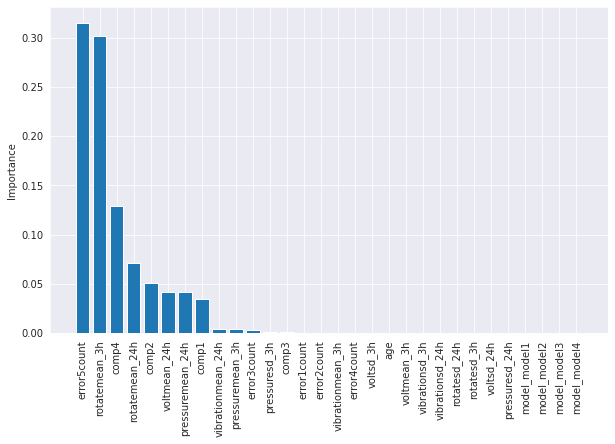

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
labels, importances = zip(*sorted(zip(test_X.columns, models[0].feature_importances_), reverse=True, key=lambda x: x[1]))
plt.xticks(range(len(labels)), labels)
_, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.bar(range(len(importances)), importances)
plt.ylabel('Importance')

Text(0, 0.5, 'Count')

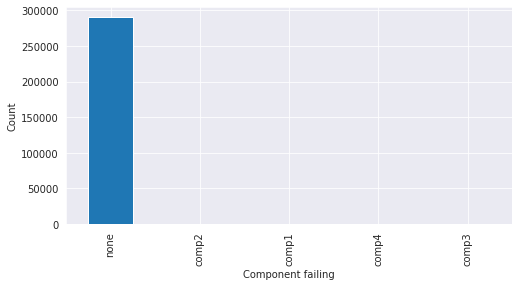

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
labeled_features['failure'].value_counts().plot(kind='bar')
plt.xlabel('Component failing')
plt.ylabel('Count')

In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score

def Evaluate(predicted, actual, labels):
    output_labels = []
    output = []
    
    # Calculate and display confusion matrix
    cm = confusion_matrix(actual, predicted, labels=labels)
    print('Confusion matrix\n- x-axis is true labels (none, comp1, etc.)\n- y-axis is predicted labels')
    print(cm)
    
    # Calculate precision, recall, and F1 score
    accuracy = np.array([float(np.trace(cm)) / np.sum(cm)] * len(labels))
    precision = precision_score(actual, predicted, average=None, labels=labels)
    recall = recall_score(actual, predicted, average=None, labels=labels)
    f1 = 2 * precision * recall / (precision + recall)
    output.extend([accuracy.tolist(), precision.tolist(), recall.tolist(), f1.tolist()])
    output_labels.extend(['accuracy', 'precision', 'recall', 'F1'])
    
    # Calculate the macro versions of these metrics
    output.extend([[np.mean(precision)] * len(labels),
                   [np.mean(recall)] * len(labels),
                   [np.mean(f1)] * len(labels)])
    output_labels.extend(['macro precision', 'macro recall', 'macro F1'])
    
    # Find the one-vs.-all confusion matrix
    cm_row_sums = cm.sum(axis = 1)
    cm_col_sums = cm.sum(axis = 0)
    s = np.zeros((2, 2))
    for i in range(len(labels)):
        v = np.array([[cm[i, i],
                       cm_row_sums[i] - cm[i, i]],
                      [cm_col_sums[i] - cm[i, i],
                       np.sum(cm) + cm[i, i] - (cm_row_sums[i] + cm_col_sums[i])]])
        s += v
    s_row_sums = s.sum(axis = 1)
    
    # Add average accuracy and micro-averaged  precision/recall/F1
    avg_accuracy = [np.trace(s) / np.sum(s)] * len(labels)
    micro_prf = [float(s[0,0]) / s_row_sums[0]] * len(labels)
    output.extend([avg_accuracy, micro_prf])
    output_labels.extend(['average accuracy',
                          'micro-averaged precision/recall/F1'])
    
    # Compute metrics for the majority classifier
    mc_index = np.where(cm_row_sums == np.max(cm_row_sums))[0][0]
    cm_row_dist = cm_row_sums / float(np.sum(cm))
    mc_accuracy = 0 * cm_row_dist; mc_accuracy[mc_index] = cm_row_dist[mc_index]
    mc_recall = 0 * cm_row_dist; mc_recall[mc_index] = 1
    mc_precision = 0 * cm_row_dist
    mc_precision[mc_index] = cm_row_dist[mc_index]
    mc_F1 = 0 * cm_row_dist;
    mc_F1[mc_index] = 2 * mc_precision[mc_index] / (mc_precision[mc_index] + 1)
    output.extend([mc_accuracy.tolist(), mc_recall.tolist(),
                   mc_precision.tolist(), mc_F1.tolist()])
    output_labels.extend(['majority class accuracy', 'majority class recall',
                          'majority class precision', 'majority class F1'])
        
    # Random accuracy and kappa
    cm_col_dist = cm_col_sums / float(np.sum(cm))
    exp_accuracy = np.array([np.sum(cm_row_dist * cm_col_dist)] * len(labels))
    kappa = (accuracy - exp_accuracy) / (1 - exp_accuracy)
    output.extend([exp_accuracy.tolist(), kappa.tolist()])
    output_labels.extend(['expected accuracy', 'kappa'])
    

    # Random guess
    rg_accuracy = np.ones(len(labels)) / float(len(labels))
    rg_precision = cm_row_dist
    rg_recall = np.ones(len(labels)) / float(len(labels))
    rg_F1 = 2 * cm_row_dist / (len(labels) * cm_row_dist + 1)
    output.extend([rg_accuracy.tolist(), rg_precision.tolist(),
                   rg_recall.tolist(), rg_F1.tolist()])
    output_labels.extend(['random guess accuracy', 'random guess precision',
                          'random guess recall', 'random guess F1'])
    
    # Random weighted guess
    rwg_accuracy = np.ones(len(labels)) * sum(cm_row_dist**2)
    rwg_precision = cm_row_dist
    rwg_recall = cm_row_dist
    rwg_F1 = cm_row_dist
    output.extend([rwg_accuracy.tolist(), rwg_precision.tolist(),
                   rwg_recall.tolist(), rwg_F1.tolist()])
    output_labels.extend(['random weighted guess accuracy',
                          'random weighted guess precision',
                          'random weighted guess recall',
                          'random weighted guess F1'])

    output_df = pd.DataFrame(output, columns=labels)
    output_df.index = output_labels
                  
    return output_df

In [ ]:
evaluation_results = []
for i, test_result in enumerate(test_results):
    print('\nSplit %d:' % (i+1))
    evaluation_result = Evaluate(actual = test_result['failure'],
                                 predicted = test_result['predicted_failure'],
                                 labels = ['none', 'comp1', 'comp2', 'comp3', 'comp4'])
    evaluation_results.append(evaluation_result)
evaluation_results[0]  # show full results for first split only


Split 1:
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels
[[122156      8      3    148      1]
 [     4     53      3      5      1]
 [     2     25     34     51      0]
 [     0      3      0     49      0]
 [     2     70      0      0      1]]

Split 2:
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels
[[97293     9   149     8   115]
 [    3    43     5     0     0]
 [    0     2    80     6     3]
 [    4     1     1    34     0]
 [   52     0     0     1     4]]

Split 3:
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels
[[73617     7     0     3     2]
 [    1    32     4     0     2]
 [   59     8     5     0     0]
 [    2     1     0    25     0]
 [    2     4     7     1    27]]


,none,comp1,comp2,comp3,comp4
accuracy,0.997341,0.997341,0.997341,0.997341,0.997341
precision,0.999935,0.333333,0.850000,0.193676,0.333333
recall,0.998692,0.803030,0.303571,0.942308,0.013699
F1,0.999313,0.471111,0.447368,0.321311,0.026316
macro precision,0.542055,0.542055,0.542055,0.542055,0.542055
macro recall,0.612260,0.612260,0.612260,0.612260,0.612260
macro F1,0.453084,0.453084,0.453084,0.453084,0.453084
average accuracy,0.998937,0.998937,0.998937,0.998937,0.998937
micro-averaged precision/recall/F1,0.997341,0.997341,0.997341,0.997341,0.997341
majority class accuracy,0.997529,0.000000,0.000000,0.000000,0.000000


In [ ]:
evaluation_results = []
for i, test_result in enumerate(test_results):
    print('\nSplit %d:' % (i+1))
    evaluation_result = Evaluate(actual = test_result['failure'],
                                 predicted = test_result['predicted_failure'],
                                 labels = ['none', 'comp1', 'comp2', 'comp3', 'comp4'])
    evaluation_results.append(evaluation_result)
evaluation_results[1]


Split 1:
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels
[[122156      8      3    148      1]
 [     4     53      3      5      1]
 [     2     25     34     51      0]
 [     0      3      0     49      0]
 [     2     70      0      0      1]]

Split 2:
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels
[[97293     9   149     8   115]
 [    3    43     5     0     0]
 [    0     2    80     6     3]
 [    4     1     1    34     0]
 [   52     0     0     1     4]]

Split 3:
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels
[[73617     7     0     3     2]
 [    1    32     4     0     2]
 [   59     8     5     0     0]
 [    2     1     0    25     0]
 [    2     4     7     1    27]]


,none,comp1,comp2,comp3,comp4
accuracy,0.996330,0.996330,0.996330,0.996330,0.996330
precision,0.999394,0.781818,0.340426,0.693878,0.032787
recall,0.997120,0.843137,0.879121,0.850000,0.070175
F1,0.998256,0.811321,0.490798,0.764045,0.044693
macro precision,0.569660,0.569660,0.569660,0.569660,0.569660
macro recall,0.727911,0.727911,0.727911,0.727911,0.727911
macro F1,0.621822,0.621822,0.621822,0.621822,0.621822
average accuracy,0.998532,0.998532,0.998532,0.998532,0.998532
micro-averaged precision/recall/F1,0.996330,0.996330,0.996330,0.996330,0.996330
majority class accuracy,0.997557,0.000000,0.000000,0.000000,0.000000


In [ ]:
evaluation_results = []
for i, test_result in enumerate(test_results):
    print('\nSplit %d:' % (i+1))
    evaluation_result = Evaluate(actual = test_result['failure'],
                                 predicted = test_result['predicted_failure'],
                                 labels = ['none', 'comp1', 'comp2', 'comp3', 'comp4'])
    evaluation_results.append(evaluation_result)
evaluation_results[2]


Split 1:
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels
[[122156      8      3    148      1]
 [     4     53      3      5      1]
 [     2     25     34     51      0]
 [     0      3      0     49      0]
 [     2     70      0      0      1]]

Split 2:
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels
[[97293     9   149     8   115]
 [    3    43     5     0     0]
 [    0     2    80     6     3]
 [    4     1     1    34     0]
 [   52     0     0     1     4]]

Split 3:
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels
[[73617     7     0     3     2]
 [    1    32     4     0     2]
 [   59     8     5     0     0]
 [    2     1     0    25     0]
 [    2     4     7     1    27]]


,none,comp1,comp2,comp3,comp4
accuracy,0.998605,0.998605,0.998605,0.998605,0.998605
precision,0.999131,0.615385,0.312500,0.862069,0.870968
recall,0.999837,0.820513,0.069444,0.892857,0.658537
F1,0.999484,0.703297,0.113636,0.877193,0.750000
macro precision,0.732011,0.732011,0.732011,0.732011,0.732011
macro recall,0.688238,0.688238,0.688238,0.688238,0.688238
macro F1,0.688722,0.688722,0.688722,0.688722,0.688722
average accuracy,0.999442,0.999442,0.999442,0.999442,0.999442
micro-averaged precision/recall/F1,0.998605,0.998605,0.998605,0.998605,0.998605
majority class accuracy,0.997561,0.000000,0.000000,0.000000,0.000000


In [ ]:
recall_df = pd.DataFrame([evaluation_results[0].loc['recall'].values,
                          evaluation_results[1].loc['recall'].values,
                          evaluation_results[2].loc['recall'].values],
                         columns = ['none', 'comp1', 'comp2', 'comp3', 'comp4'],
                         index = ['recall for first split',
                                  'recall for second split',
                                  'recall for third split'])
recall_df

,none,comp1,comp2,comp3,comp4
recall for first split,0.998692,0.803030,0.303571,0.942308,0.013699
recall for second split,0.997120,0.843137,0.879121,0.850000,0.070175
recall for third split,0.999837,0.820513,0.069444,0.892857,0.658537


In [ ]:
test_result.predicted_failure.unique()

array(['none', 'comp4', 'comp1', 'comp3', 'comp2'], dtype=object)